In [1]:
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import plot, iplot
import numpy as np
import scipy as sp
import pandas as pd
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import missingno as msno 
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data into dataframes using pandas
data = pd.read_csv('fifa20.csv', sep=',')

In [3]:
# check the loaded data in dataframe shape, we can see that there are 104 columns which we will analyse later on
data.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [4]:
# for more insight, we need to check the dataframes info that includes all information about it from entries, dtypes, etc
data.info()
# as we can see down below, there is 18278 entries or row, and the dytpes divided into 3 which is flow, int, and object with
# sum of the column and we will go to 4 steps in ML from problem to Solution.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In Machine Learning there are mainly 4 steps from problem to solution, and here we will cover all of that on our way
to reach best solutions

# 1 Manage Data
Collect : Done
Explore : Undone
Cleanse : Undone
Prepare : Undone
Split   : Undone

In [5]:
# Here, at first we're going to gain insight from the dataset so that we can analyze it
print('Sum of Numerical Columns: ', len(data.select_dtypes(exclude=object).columns))
print('Sum of Categorical Columns: ', len(data.select_dtypes(include=object).columns))

Sum of Numerical Columns:  61
Sum of Categorical Columns:  43


Our dataset/dataframse consist into 43 categorical features and 61 numerical features

In [6]:
cols = data.columns.tolist()
cols
# we can see below the property of fifa datasets

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

A . DATA CLEANING
Here we are going to dealing with unnecessary features and missing values

In [7]:
# here we try to drop some of the unneccessary features which i think it doesn't bring any good
# or influence to our model to feed it, so i'll drop it.
data.drop(columns=['joined', 'contract_valid_until', 'real_face', 'release_clause_eur', 'player_url',
                  'pace', 'team_position', 'shooting','dob', 'long_name', 'short_name'], inplace=True)

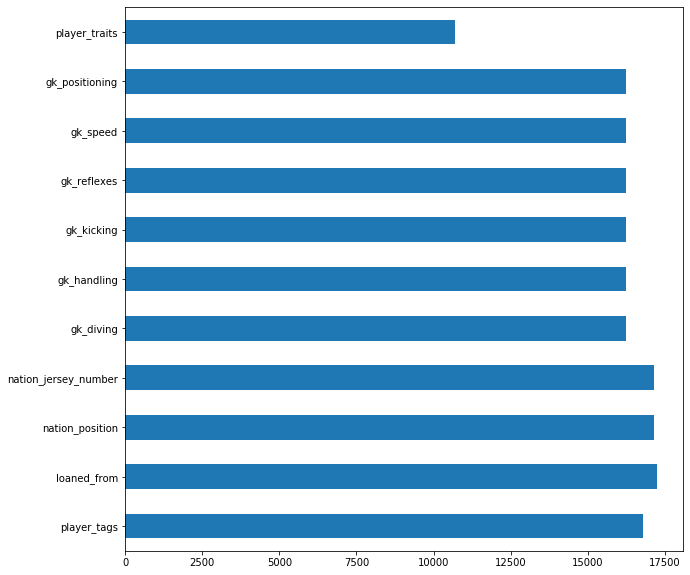

In [10]:
#now we are going to check the Null cell or missing value from all features more with half of the data, 
# a high missing vallue will only get in our way because of most of value from this features is nan
plt.figure(figsize=(10, 10))
data.isnull().sum()[data.isnull().sum() >= 10000].plot.barh()

In [15]:
# Dropping column based on above condition because we cant fill the missing value in large number of missed
# See the above list of the > 10000 missing value features to drop
data.drop(columns=['loaned_from','player_tags', 'nation_position', 'nation_jersey_number', 'gk_diving'
                  , 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
                  'player_traits'], inplace=True)

In [17]:
# check missing value again from other features here.
plt.figure(figsize=(10, 10))
msno.heatmap(data)

<Figure size 720x720 with 0 Axes>

In [28]:
# we've also seen there is still high missing value from above so we'have to
# drop the remain features with high missing value number 
data.drop(columns=['team_jersey_number', 'passing', 'dribbling', 'defending', 'physic'], inplace=True)

# we'll take column skills and nationality as player positions here as a main variable for classification later on
data[data['player_positions'].isna()][['nationality', 'ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw',
                              'lam', 'cam', 'ram', 'lm', 'lcm','cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 
                              'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]
data['player_positions'].head(5)

0    RW, CF, ST
1        ST, LW
2       LW, CAM
3            GK
4        LW, CF
Name: player_positions, dtype: object

In [29]:
# Can fill in position manually but LS, RS, CF, etc. 
# these features has no values, so  i need to drop them.
data.drop(index=data[data['player_positions'].isna()].index, inplace=True)

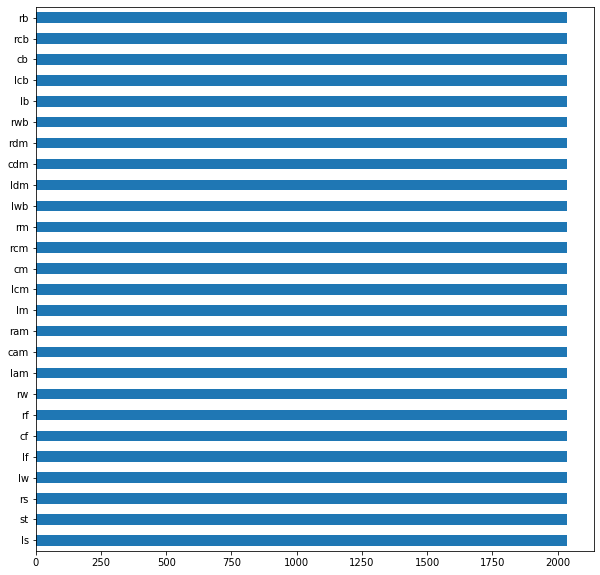

In [33]:
# we'll still inspect all features missing value more than 0
plt.figure(figsize=(10, 10))
data.isnull().sum()[data.isnull().sum() > 0].plot.barh()

In [39]:
# if we analyze the above features not list or set for GoalKeepers which means
# Goal Keeper are unique from other player
len(data[data['player_positions'] == 'GK'])

2036

In [40]:
#we will fill the GK with 0
data.fillna(value=0, inplace=True)
data.isnull().sum().sum()

0

DATA CLEANING : DONE, our dataset doesn't contain any missing values

B. Preparing Data

In [41]:
# Handling Categorical Features by convert it so let's see which column is categorical features
data.select_dtypes(include=object).columns

Index(['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [44]:
data[['nationality', 'club', 'player_positions', 'preferred_foot',
       'work_rate', 'body_type', 'ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm','cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 
    'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

nationality                 club player_positions preferred_foot  \
0   Argentina         FC Barcelona       RW, CF, ST           Left   
1    Portugal             Juventus           ST, LW          Right   
2      Brazil  Paris Saint-Germain          LW, CAM          Right   
3    Slovenia      Atlético Madrid               GK          Right   
4     Belgium          Real Madrid           LW, CF          Right   

       work_rate   body_type    ls    st    rs    lw  ...   lwb   ldm   cdm  \
0     Medium/Low       Messi  89+2  89+2  89+2  93+2  ...  68+2  66+2  66+2   
1       High/Low  C. Ronaldo  91+3  91+3  91+3  89+3  ...  65+3  61+3  61+3   
2    High/Medium      Neymar  84+3  84+3  84+3  90+3  ...  66+3  61+3  61+3   
3  Medium/Medium      Normal     0     0     0     0  ...     0     0     0   
4    High/Medium      Normal  83+3  83+3  83+3  89+3  ...  66+3  63+3  63+3   

    rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3     0     0     0     0     0     0     0  
4  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 32 columns]

In [45]:
# we can see the value of each features above are mixed with
# + character..we should sum the integer so that the value is fully numeric
def convertSkill(var):
    if type(var) == str:
        s1 = var[0:2]
        s2 = var[-1]
        var = int(s1) + int(s2)
        return var
    
    else:
        return var

In [46]:
# convert all of this below column in one shot
cols_skill = ['ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm','cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 
    'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
for i in cols_skill :
    data[i] = data[i].apply(convertSkill)

In [47]:
data[['ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm','cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 
    'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ...  lwb  ldm  cdm  rdm  rwb  lb  \
0  91  91  91  95  95  95  95  95   95   95  ...   70   68   68   68   70  65   
1  94  94  94  92  93  93  93  92   91   91  ...   68   64   64   64   68  64   
2  87  87  87  93  92  92  92  93   93   93  ...   69   64   64   64   69  64   
3   0   0   0   0   0   0   0   0    0    0  ...    0    0    0    0    0   0   
4  86  86  86  92  91  91  91  92   92   92  ...   69   66   66   66   69  64   

   lcb  cb  rcb  rb  
0   54  54   54  65  
1   56  56   56  64  
2   49  49   49  64  
3    0   0    0   0  
4   52  52   52  64  

[5 rows x 26 columns]

In [48]:
# from my observation, i have to check the unique part of work rate or all types of value in the
# features here we can see the classes
data['work_rate'].unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [49]:
# from my observation, i have to check the unique part of work rate or all types of value in the
# features here we can see the classes, we should conver this players to their body type, not their name
data['body_type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean',
       'PLAYER_BODY_TYPE_25', 'Stocky', 'Courtois', 'Shaqiri',
       'Akinfenwa'], dtype=object)

In [51]:
data['body_type'].head(10)
# we can see below their body type was their name, it shouldn't mix name and body type

0                  Messi
1             C. Ronaldo
2                 Neymar
3                 Normal
4                 Normal
5                 Normal
6                 Normal
7                 Normal
8                   Lean
9    PLAYER_BODY_TYPE_25
Name: body_type, dtype: object

In [52]:
# PLAYER_BODY_TYPE_25 is Mohammed Salah which has a normal body.
# here we convert those player with name from body_type to their real body type
data['body_type'][data['body_type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['body_type'][data['body_type'] == 'Shaqiri'] = 'Stocky'
data['body_type'][data['body_type'] == 'Akinfenwa'] = 'Stocky'
data['body_type'][data['body_type'] == 'Messi'] = 'Lean'
data['body_type'][data['body_type'] == 'C. Ronaldo'] = 'Normal'
data['body_type'][data['body_type'] == 'Neymar'] = 'Lean'
data['body_type'][data['body_type'] == 'Courtois'] = 'Lean'

In [54]:
print(data['player_positions'].unique())
print(data['player_positions'].nunique())
# we can see there are a lots of skills type, we'll handle them to several classes in player_positions

['RW, CF, ST' 'ST, LW' 'LW, CAM' 'GK' 'LW, CF' 'CAM, CM' 'CB' 'CM'
 'RW, ST' 'ST, RW' 'ST' 'CDM, CM' 'CF, ST, LW' 'CAM, RW' 'CM, CDM'
 'RW, LW' 'CAM, LM, ST' 'ST, LM' 'LW, LM' 'CB, LB' 'RW, CAM, CM' 'CDM'
 'CF, LM' 'CF, ST' 'LB' 'CM, CAM, CDM' 'CF, LW, ST' 'LW' 'CB, CDM'
 'RB, CM, CDM' 'CAM, CM, LW' 'CF, ST, CAM' 'LW, CM' 'CAM, RM, RW'
 'CM, CAM' 'CM, LM, RM' 'LB, CB' 'RB' 'CAM, CF, ST' 'RW, LW, ST' 'LB, LM'
 'RM, LM, CM' 'CAM, CM, RM' 'RM, LM' 'CAM, RM' 'CF, LW, CAM' 'CAM, LM, RM'
 'LM, RM, LW' 'RM, LM, LW' 'CAM' 'CAM, CM, CF' 'LM' 'CDM, CB' 'RB, CB'
 'RM, RW' 'LM, RW, LW' 'RM, CM' 'CAM, LW, ST' 'RW, RM' 'CM, CDM, CAM'
 'CM, CAM, CF' 'LW, ST, LM' 'LM, ST' 'RM, RW, ST' 'LM, CAM, RM' 'LW, RW'
 'CF, LM, LW' 'RM, CAM' 'CF, RM, LM' 'RW, LW, CAM' 'CDM, CM, CAM'
 'CDM, CB, LB' 'ST, CAM, LW' 'ST, CF' 'RW, CAM' 'LW, LM, RW' 'RW, CAM, LW'
 'RM, ST' 'CM, CDM, RM' 'RW, CF' 'RB, RM' 'CAM, LW' 'CF, CAM, CM'
 'RB, RM, CM' 'LWB, LM, LB' 'ST, RW, LW' 'CB, LB, RB' 'RM, LM, CF'
 'CAM, LM' 'LM, LWB' 'LM,

In [55]:
# as we know, in soccer, we know 4 main role, which is forwards,
# Midfielder, Defenders and also Goal Keeper, we will categorize them
def CategoryPosition(var):    
    if var == 'RF' or var == 'ST' or var == 'LF' or var == 'RS' or var == 'LS' or var == 'CF' or var == 'ST, LW' or var == 'ST, RM'\
        or var == 'ST, LM':
        var = 'F'
        return var
        
    elif var == 'LW' or var == 'RCM' or var == 'LCM' or var == 'LDM' or var == 'CAM' or var == 'CDM' or var == 'RM' \
         or var == 'LAM' or var == 'LM' or var == 'RDM' or var == 'RW' or var == 'CM' or var == 'RAM' or var == 'CM, CDM'\
            or var == 'CDM, CM' or var == 'CAM, CM' or var == 'CDM, CB'\
            or var == 'RM, LM' or var == 'LM, RM' or var == 'CB, CDM' or var == 'LB, LM' or var == 'CM, CAM' or var == 'RB, RM'\
            or var == 'LB, LWB' or var == 'ST, CAM':
        var = 'M'
        return var

    
    elif var == 'RCB' or var == 'CB' or var == 'LCB' or var == 'LB' or var == 'RB' or var == 'RWB' or var == 'LWB'\
            or var == 'CB, RB' or var == 'CB, LB' or var == 'RB, LB' or var == 'RB, CB' or var == 'LB, CB' or var == 'RB, RWB':
        var = 'D'
        return var
    
    else:
        return var

In [56]:
# applying position converter category and drop all value unless those 3 category
data['player_positions'] = data['player_positions'].apply(CategoryPosition)
data_new=data.drop(data[(data['player_positions'] != 'M') & (data['player_positions'] != 'D') & (data['player_positions'] != 'GK') &
                   (data['player_positions'] != 'F')].index)
data['player_positions'] = data_new['player_positions']
data_new['player_positions'].head(10)

1      F
3     GK
5      M
6     GK
7      D
8      M
11     D
12     F
13    GK
14    GK
Name: player_positions, dtype: object

In [62]:
data['player_positions'].value_counts()
data['player_positions'].head(5)

0    NaN
1      F
2    NaN
3     GK
4    NaN
Name: player_positions, dtype: object

We can see that there are NaN values in our player_positions value,
we should fill them with our manual imputation here below with position converter
with scenario that we will convert them to numeric and fill the missing value 
and convert them back to categorical

In [63]:
def num_position(var):
    if var == 'GK':
        return 0
    elif var == 'M':
        return 2
    elif var == 'D':
        return 1
    elif var == 'F':
        return 3
    else:
        return np.nan
def num_position1(var):
    if var == 0:
        return 'GK'
    elif var == 2:
        return 'M'
    elif var == 1:
        return 'D'
    elif var == 3:
        return 'F'

In [64]:
# we're now convert them to numeric
data['player_positions'] = data['player_positions'].apply(num_position)
print("Missing value :", data['player_positions'].isnull().sum())
# i'll fill the missing value with value 2 which is Midfielder
data['player_positions'] = data['player_positions'].fillna(2)
print("Missing value after imputation :", data['player_positions'].isnull().sum())

4433


0

In [65]:
# we'll convert them back to categorical and let's do check and recheck for missing value
data['player_positions'] = data['player_positions'].apply(num_position1)
data['player_positions'].isnull().sum()

0

In [68]:
# we can see our positions distribution is not well spreaded by the same percentage. but let's deep dive
# to our dataset first
data['player_positions'].value_counts()

M     9580
D     4531
F     2131
GK    2036
Name: player_positions, dtype: int64

In [69]:
# now let's check some features for data exploration to see if the feature is usefull or useless
# we'll check nationality here and we'll see their distribution
df_nations = data.groupby(by='nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']

In [71]:
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]
# each of this nation has a number player from count 

Nation  Count
45            England   1667
113  Northern Ireland     81
128          Scotland    277
159             Wales    117

In [73]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()
# we've add United Kingdom player in 2148 player

Nation  Count
159           Wales    117
160          Zambia     10
161        Zimbabwe     12
162  United Kingdom   2148
163  United Kingdom   2148

In [74]:
# Explore and analyze the data from where the came from and most of the player came from UK
# with earth plot distribution
earth = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[earth], layout=layout)
py.iplot(fig)

In [76]:
# highest number of player on age 22 years old
age = go.Histogram(x=data['age'], nbinsx=55, opacity=0.7)

layout = go.Layout(title='<b>Players Age Distribution<b>',
                   xaxis=dict(title='<b><i>Age</b></i>'),
                   yaxis=dict(title='<b><i>Count</b></i>'),
                  )

fig = go.Figure(data=[age], layout=layout)
py.iplot(fig)
# mostly the range of players from 20 to 35 years old

In [77]:
fig = tools.make_subplots(rows=1, cols=2)

height = go.Histogram(x=data['height_cm'], nbinsx=25, opacity=0.7, name='Height in cms')
weight = go.Histogram(x=data['weight_kg'], nbinsx=30, opacity=0.7, name='Weight in kilograms')

fig.append_trace(height, 1,1)
fig.append_trace(weight, 1,2)

fig['layout'].update(title='<b>Height & Weight Distribution</b>', \
                     xaxis=dict(automargin=True),
                     yaxis=dict(title='<b><i>Count</b></i>')
                    )
py.iplot(fig)
# we can see the histogram down below that most player in range 170 cm to 195 cm
# in weight we can see the distribution mostly within 60 kg to 90 kg

In [78]:
# for player positions let's check their positions distribution
player = go.Pie(values=data['player_positions'].value_counts().values,
                labels=data['player_positions'].value_counts().index.values,
                hole=0.3
               )
 

layout = go.Layout(title='<b>Distribution of Players Position-Wise</b>')

fig = go.Figure(data=[player], layout=layout)
py.iplot(fig)
# each of the position has a different percentage of number players

In [79]:
# let's check this value of preferred foot of player
foot = go.Pie(values=data['preferred_foot'].value_counts().values,
                 labels=data['preferred_foot'].value_counts().index.values,
                 hole=0.3
                )
 

layout = go.Layout(title='<b>Preferred Foot</b>')

fig = go.Figure(data=[foot], layout=layout)
py.iplot(fig)
# mostly the player prefered right footed than left footed, we now know that this feature
# is useless, we'll drop it later

In [80]:
work = go.Violin(x=data['work_rate'],
                y=data['overall']
               )

layout = go.Layout(title='<b>Work Rate vs Overall</b>',
                   xaxis=dict(title='<b><i>Work Rate</b></i>'),
                   yaxis=dict(title='<b><i>Overall</b></i>')
                  )

fig = go.Figure(data=[work], layout=layout)
py.iplot(fig)
# this plot below that mostly players has similar overall accross different work rates so it means it independent
# work rate and overall is also seems doesn't give much support for our training based on figure below
# we'll drop them later on.

In [81]:
# We are choosing 6 attributes here. We are grouping the data by Position and finding the average of our 6 attributes.
df_skills = data.groupby(by='player_positions')['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions'].mean().reset_index()

In [83]:
# We'll plot each positions skewed skills of each player here.
F = go.Scatterpolar(theta=['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions'],r=df_skills[df_skills['player_positions'] == 'F'][['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions']].values[0],fill='toself', name='Forwards')

M = go.Scatterpolar(theta=['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions'],r=df_skills[df_skills['player_positions'] == 'M'][['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions']].values[0],fill='toself', name='Midfielders')

D = go.Scatterpolar(theta=['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions'],r=df_skills[df_skills['player_positions'] == 'D'][['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions']].values[0],fill='toself', name='Defenders')


GK = go.Scatterpolar(theta=['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions'],r=df_skills[df_skills['player_positions'] == 'GK'][['attacking_crossing', 'attacking_finishing', 'skill_fk_accuracy', 
                            'defending_standing_tackle', 'defending_marking', 'mentality_interceptions']].values[0], fill='toself', name='Goal Keepers')

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,range=[0, 100])),showlegend=True,
                   title='<b>Attributes by Position</b>')

fig = go.Figure(data=[F, M, D, GK], layout=layout)
py.iplot(fig)

we can see the graphic above shows that for defending, marking, interception defender dominate, and overall it's good
midfielders best at everything and mostly at accuracy and crossing
forward obviously best at finishing to make goal score

In [84]:
# i think we've seen enough here for other features distribution
# after exploration, now we require to convert the rest of the categorical data such as skills GK = 0, D= 1, M = 2, F = 3
data['player_positions'] = data['player_positions'].apply(num_position)

In [85]:
data['player_positions'].head(10)

0    2
1    3
2    2
3    0
4    2
5    2
6    0
7    1
8    2
9    2
Name: player_positions, dtype: int64

# 2. TRAIN MODELS, 
# 3. EVALUATIONS 
# 4. DEPLOY MODEL (TUNING/IMPROVEMENT) / SOLUTIONS

Now, the second steps to 4 for the solution section start here.

<img src="xgb.jpg" style="width: 400px;" align="left">
<img src="ds.jpg" style="width: 400px;" align="right">

The MODEL that i will use here is XGBoost and RandomForest, Decision Tree and Regression based on above information

we will split the data here too which is part of 1. Manage Data

In [86]:
df_pos = data.copy()

# For the learning we will drop unimportant features that we've seen on ln/cell 74 of earth distribution
# also club
df_pos.drop(columns=['nationality', 'club'], inplace=True)

We are classifying PLAYER POSITIONS !!!!!

In [87]:
# This is dataset Data for classification
X = df_pos.drop(columns=['player_positions'])

# I separate the numeric from categorical feature using Pandas Dummies property
X = pd.get_dummies(X)

# I set the dataset Target for the classification
y = df_pos['player_positions']
X.shape, y.shape

((18278, 85), (18278,))

# SPLITTING DONE

In [88]:
# Splitting dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4471, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10105, 85), (8173, 85), (10105,), (8173,))

LET'S TRY To PREDICT HERE SHALL WE?!

In [90]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [91]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       0.81      0.85      0.83      2032
           2       0.89      0.87      0.88      4255
           3       0.86      0.83      0.84       943

    accuracy                           0.88      8173
   macro avg       0.89      0.89      0.89      8173
weighted avg       0.88      0.88      0.88      8173



[[ 943    0    0    0]
 [   0 1737  295    0]
 [   0  411 3717  127]
 [   0    0  165  778]]


Accuracy Score:  0.8778906154410865
MAE:  0.1221093845589135
MSE:  0.1221093845589135
result mean : 0.8629508263477931, result std : 0.015478090179425391


for this experiments we gain 87 % for accuracy, let's try to improve it! because we are classifying PLAYER POSITIONS
we need to find the correlation with other features but first try another classifier, example XGBOOST

In [92]:
model = XGBClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [93]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       0.81      0.84      0.83      2032
           2       0.88      0.87      0.88      4255
           3       0.84      0.82      0.83       943

    accuracy                           0.87      8173
   macro avg       0.89      0.88      0.88      8173
weighted avg       0.88      0.87      0.87      8173



[[ 943    0    0    0]
 [   0 1716  316    0]
 [   0  391 3719  145]
 [   0    1  170  772]]


Accuracy Score:  0.8748317631224765
MAE:  0.12529059097026796
MSE:  0.12553529915575676
result mean : 0.8658497207580436, result std : 0.009366759178876074


we'll try to improve more by calculate correlation between features

In [102]:
df_pos.corr().abs()['player_positions'].sort_values(ascending=False)

player_positions             1.000000
attacking_finishing          0.812176
rs                           0.798399
ls                           0.798399
st                           0.798399
lf                           0.786275
cf                           0.786275
rf                           0.786275
mentality_positioning        0.784597
lw                           0.769555
rw                           0.769555
ram                          0.766613
cam                          0.766613
lam                          0.766613
mentality_penalties          0.746427
lm                           0.746405
rm                           0.746405
attacking_volleys            0.745022
skill_dribbling              0.731761
power_long_shots             0.727063
skill_ball_control           0.707651
lcm                          0.689220
cm                           0.689220
rcm                          0.689220
goalkeeping_diving           0.687654
goalkeeping_handling         0.685869
goalkeeping_

In [103]:
# We've seen above descending from high correlation player_positions to other features percentage
# we'also see there are several features that has the same correlation, we'll reduce the features dimension
# using our reducer here by combine those features to the main positions
df_pos['F'] = (df_pos['rf'] + df_pos['st'] + df_pos['lf'] + df_pos['rs'] + df_pos['ls'] + df_pos['cf']) / 6

df_pos['Mid'] = (df_pos['lw'] + df_pos['rcm'] + df_pos['lcm'] + df_pos['ldm'] + df_pos['cam'] + df_pos['cdm'] + \
                df_pos['rm'] + df_pos['lam'] + df_pos['lm'] + df_pos['rdm'] + df_pos['rw'] + df_pos['cm'] + df_pos['ram'])\
                /13

df_pos['D'] = (df_pos['rcb'] + df_pos['cb'] + df_pos['lcb'] + df_pos['lb'] + df_pos['rb'] + df_pos['rwb']\
                 + df_pos['lwb']) / 7

df_pos['Gk'] = (df_pos['goalkeeping_diving'] + df_pos['goalkeeping_handling'] + df_pos['goalkeeping_kicking']
                + df_pos['goalkeeping_positioning']\
               + df_pos['goalkeeping_reflexes']) / 5

In [104]:
# Now we've combine the feature, the previous feature will be drop here
df_pos.drop(columns=['ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm','cm', 'rcm', 'rm', 
                     'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'goalkeeping_diving', 'goalkeeping_handling', 
                     'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
                    ], inplace=True)
# YESSS!! We've dropped them!!

In [105]:
#Let's check another correlation features sorted
print('Correlation with Position: ', df_pos.corr().abs()['player_positions'].sort_values(ascending=False).index, '\n')

#Check remaining categorical column
print('Categorical columns in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')

#remaining features in the dataset
print('Number of features in dataset: ', len(df_pos.columns))

df_pos.corr().abs()['player_positions'].sort_values(ascending=False)

Correlation with Position:  Index(['player_positions', 'attacking_finishing', 'F', 'mentality_positioning',
       'mentality_penalties', 'attacking_volleys', 'skill_dribbling',
       'power_long_shots', 'skill_ball_control', 'Mid', 'Gk', 'skill_curve',
       'skill_moves', 'attacking_short_passing', 'movement_agility',
       'movement_acceleration', 'skill_fk_accuracy', 'movement_sprint_speed',
       'attacking_heading_accuracy', 'mentality_vision', 'power_shot_power',
       'attacking_crossing', 'power_stamina', 'movement_balance', 'D',
       'skill_long_passing', 'mentality_composure', 'height_cm', 'weight_kg',
       'weak_foot', 'mentality_aggression', 'movement_reactions',
       'power_jumping', 'age', 'potential', 'sofifa_id', 'value_eur',
       'overall', 'wage_eur', 'defending_marking', 'international_reputation',
       'defending_sliding_tackle', 'power_strength', 'mentality_interceptions',
       'defending_standing_tackle'],
      dtype='object') 

Categorical colu

player_positions              1.000000
attacking_finishing           0.812176
F                             0.793429
mentality_positioning         0.784597
mentality_penalties           0.746427
attacking_volleys             0.745022
skill_dribbling               0.731761
power_long_shots              0.727063
skill_ball_control            0.707651
Mid                           0.699117
Gk                            0.693637
skill_curve                   0.607024
skill_moves                   0.600937
attacking_short_passing       0.580447
movement_agility              0.555446
movement_acceleration         0.548539
skill_fk_accuracy             0.547114
movement_sprint_speed         0.543663
attacking_heading_accuracy    0.522409
mentality_vision              0.514059
power_shot_power              0.512660
attacking_crossing            0.511564
power_stamina                 0.489407
movement_balance              0.479771
D                             0.456434
skill_long_passing       

we've manage to sort from more than 104 columns to 48 from correlation of features to feed our model

In [106]:
#we will drop low level percentage of correlation of features that we assume it could worsen our model accuracy
df_pos.drop(columns=['defending_standing_tackle', 'potential', 'age', 'value_eur', 
                     'power_jumping', 'wage_eur', 'overall', 'defending_marking',
                     'international_reputation', 'power_strength', 'preferred_foot', 'skill_ball_control',
                     'skill_curve', 'skill_moves', 'attacking_short_passing', 'skill_fk_accuracy', 
                    'movement_agility', 'movement_acceleration', 'attacking_crossing', 'movement_sprint_speed',
                     'power_shot_power'], inplace=True)

In [108]:
df_pos.head()

sofifa_id  height_cm  weight_kg  player_positions  weak_foot  \
0     158023        170         72                 2          4   
1      20801        187         83                 3          4   
2     190871        175         68                 2          5   
3     200389        188         87                 0          3   
4     183277        175         74                 2          4   

       work_rate body_type  attacking_finishing  attacking_heading_accuracy  \
0     Medium/Low      Lean                   95                          70   
1       High/Low    Normal                   94                          89   
2    High/Medium      Lean                   87                          62   
3  Medium/Medium    Normal                   11                          15   
4    High/Medium    Normal                   84                          61   

   attacking_volleys  ...  mentality_interceptions  mentality_positioning  \
0                 88  ...                       40                     94   
1                 87  ...                       29                     95   
2                 87  ...                       36                     87   
3                 13  ...                       19                     11   
4                 83  ...                       41                     87   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   
2                90                   90                   94   
3                65                   11                   68   
4                89                   88                   91   

   defending_sliding_tackle     F        Mid          D    Gk  
0                        26  93.0  87.230769  61.714286  10.8  
1                        24  93.5  83.307692  61.714286  11.6  
2                        29  89.5  84.307692  59.000000  11.8  
3                        18   0.0   0.000000   0.000000  87.2  
4                        22  88.5  84.615385  60.285714   9.0  

[5 rows x 27 columns]

In [109]:
X = df_pos.drop(columns=['player_positions'])
X = pd.get_dummies(X)
y = df_pos['player_positions']

We use the same DIMENSION of data just like our previous training before doing correlation features analyze

In [110]:
#Splitting dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4471, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10105, 36), (8173, 36), (10105,), (8173,))

In [113]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [114]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       0.81      0.83      0.82      2032
           2       0.88      0.87      0.87      4255
           3       0.83      0.82      0.82       943

    accuracy                           0.87      8173
   macro avg       0.88      0.88      0.88      8173
weighted avg       0.87      0.87      0.87      8173



[[ 943    0    0    0]
 [   0 1685  347    0]
 [   0  389 3712  154]
 [   0    0  173  770]]


Accuracy Score:  0.8699375994127003
MAE:  0.13006240058729965
MSE:  0.13006240058729965
result mean : 0.8622936226478821, result std : 0.008564017842120375


In [115]:
model = XGBClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [116]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       0.81      0.83      0.82      2032
           2       0.88      0.87      0.87      4255
           3       0.83      0.83      0.83       943

    accuracy                           0.87      8173
   macro avg       0.88      0.88      0.88      8173
weighted avg       0.87      0.87      0.87      8173



[[ 943    0    0    0]
 [   0 1691  341    0]
 [   0  398 3696  161]
 [   0    2  161  780]]


Accuracy Score:  0.8699375994127003
MAE:  0.13030710877278845
MSE:  0.13079652514376605
result mean : 0.8568216360716173, result std : 0.012494448887235365


Hmm i see that after correlation feature importance,
our model doesnt show much improvement result but the KFold cross validation
is well enough

Here I will check some of outliers that probably worsen our prediction

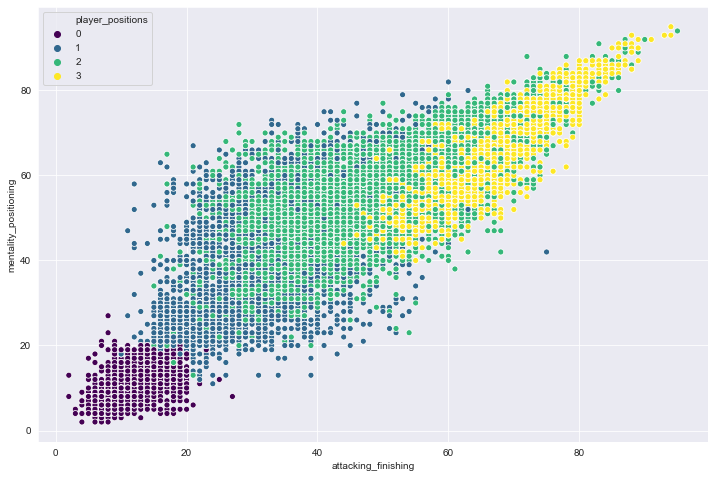

In [117]:
# Outlier Checking and we can see there are several outlier, let's throw them out!!!
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 12, 8
sns.scatterplot(data=df_pos, x='attacking_finishing', y='mentality_positioning', hue='player_positions', palette='viridis')
plt.show()

from above graphic we can see there are several outliers seen, we will remove it

In [118]:
# THROWING OUTLIERS GHRRUUUAAAHHH!!!!
# We'll only use certain range above, out of that will out
df_pos = df_pos[~((df_pos['player_positions'] == 1) & (df_pos['attacking_finishing'] > 30) & (df_pos['mentality_positioning'] < 60))]
df_pos = df_pos[~((df_pos['player_positions'] == 2) & (df_pos['attacking_finishing'] > 60) & (df_pos['mentality_positioning'] < 80))]
df_pos = df_pos[~((df_pos['player_positions'] == 3) & (df_pos['attacking_finishing'] < 45))]
df_pos = df_pos[~((df_pos['player_positions'] == 3) & (df_pos['attacking_finishing'] < 60) & (df_pos['mentality_positioning'] > 70))]
df_pos = df_pos[~((df_pos['player_positions'] == 2) & (df_pos['attacking_finishing'] > 65) & (df_pos['mentality_positioning'] > 70))]

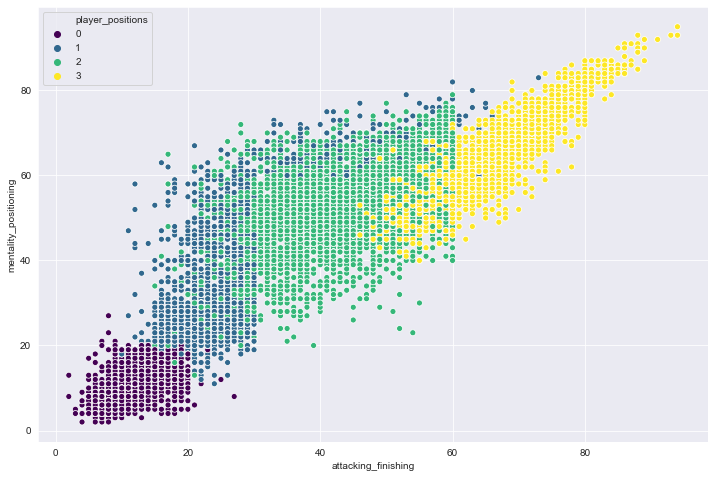

In [119]:
sns.scatterplot(data=df_pos, x='attacking_finishing', y='mentality_positioning', hue='player_positions', palette='viridis')
plt.show()
# There still several left but nevermind, if we throw them more, it will worsen our training.
# the difference is thin so it's fine

<h2> Here, i will explain to you that i use methods of multi-layers of training, what does that means?
    let me tell you a brief example, if i have 100% data, i will use 1/3 for test and the rest is for training
    and the second splitting down below the 2/3 of training that we have above with :
   ((10105, 36), (8173, 36), (10105,), (8173,)) dimension shape of data</h2>
   
    
<h2> and it will be splitted again from that for test is 1/3 of the 2/3 data that we've left to improve accuracy and make sure
   OUR MODEL AVOID OVERFITTING and UNDERFITTING, our new data down below will be :
   ((7278, 36), (5887, 36), (7278,), (5887,)) dimension shape of data
    </h2>
    

In [120]:
#lets do another classification
X = df_pos.drop(columns=['player_positions'])
X = pd.get_dummies(X)
y = df_pos['player_positions']



#Splitting dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4471, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7278, 36), (5887, 36), (7278,), (5887,))

In [121]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)


In [122]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       982
           1       0.84      0.85      0.84      1218
           2       0.92      0.92      0.92      2766
           3       0.96      0.96      0.96       921

    accuracy                           0.92      5887
   macro avg       0.93      0.93      0.93      5887
weighted avg       0.92      0.92      0.92      5887



[[ 982    0    0    0]
 [   0 1030  184    4]
 [   0  203 2535   28]
 [   0    0   40  881]]


Accuracy Score:  0.9220315950399185
MAE:  0.07864786818413454
MSE:  0.08000679463224053
result mean : 0.9200928124848545, result std : 0.02008680610484733


In [123]:
model = XGBClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [124]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       982
           1       0.84      0.87      0.85      1218
           2       0.93      0.91      0.92      2766
           3       0.96      0.95      0.96       921

    accuracy                           0.92      5887
   macro avg       0.93      0.93      0.93      5887
weighted avg       0.93      0.92      0.93      5887



[[ 982    0    0    0]
 [   0 1063  153    2]
 [   0  209 2525   32]
 [   0    0   46  875]]


Accuracy Score:  0.9249193137421438
MAE:  0.0754204178698828
MSE:  0.07609988109393578
result mean : 0.9189512639253345, result std : 0.024329286899310295


<h2>Wow!!! OUR ACCURACY HAS INCREASED SHARPLY with small errors and good KFold Cross Validation means</h2>

<h3>With this results i ask for the result to a credible forum, my results are good or not?
    and some one came up with a good comment of question that reminds me of something, MY DATASET IS IMBALANCE,
    take a look below picture
</h3>

<img src="resampling.jpg" style="width: 400px;" align="left">

In [128]:
df_pos['player_positions'].value_counts()
# See?!! Our Distribution here is not the same for each positions

2    6310
1    2692
3    2127
0    2036
Name: player_positions, dtype: int64

# RESAMPLING

In [129]:
# Here i do resampling based on majority class!!

# Separate majority and minority classes
df_majority = df_pos[df_pos.player_positions==2]
df_minority1 = df_pos[df_pos.player_positions==1]
df_minority2 = df_pos[df_pos.player_positions==3]
df_minority3 = df_pos[df_pos.player_positions==0]
 
# Upsample minority class
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=6310,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=6310,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled3 = resample(df_minority3, zsni
                                 replace=True,     # sample with replacement
                                 n_samples=6310,    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled1, df_minority_upsampled2, df_minority_upsampled3])
 
# Display new class counts
df_upsampled.player_positions.value_counts()

3    6310
2    6310
1    6310
0    6310
Name: player_positions, dtype: int64

<h1>now we have the same distribution for each position</h1>

In [78]:
#Checking with diagram distribution and our class now is balanced!
player = go.Pie(values=df_upsampled['player_positions'].value_counts().values,
                labels=df_upsampled['player_positions'].value_counts().index.values,
                hole=0.3
               )
 

layout = go.Layout(title='<b>Distribution of Players Position-Wise</b>')

fig = go.Figure(data=[player], layout=layout)
py.iplot(fig)

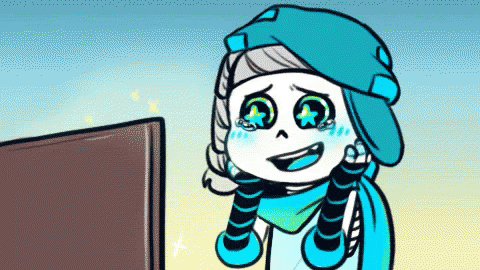

In [143]:
Image(filename="tenor.gif")

<h2>Yess!! My Dataset now is balanced</h2>

In [144]:
# Before training, we'll handle categorical data here, convert it as a part of our features

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

<h2>Because i have balanced my dataset, now the numbers of data is increased
    from originally 18278 to 25240 row of data
    The dimension below is : ((13955, 26), (11285, 26), (13955,), (11285,)) shape </h2>

In [160]:
X = df_upsampled.drop(['player_positions'], axis=1)
X = handle_non_numerical_data(X)
y = df_upsampled.player_positions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4471, random_state=45)
df_upsampled.to_csv('Explored_Dataset.csv')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13955, 26), (11285, 26), (13955,), (11285,))

In [149]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [150]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2818
           1       0.92      0.98      0.95      2804
           2       0.97      0.89      0.93      2751
           3       0.98      0.99      0.99      2912

    accuracy                           0.97     11285
   macro avg       0.97      0.97      0.97     11285
weighted avg       0.97      0.97      0.97     11285



[[2818    0    0    0]
 [   0 2737   67    0]
 [   0  246 2452   53]
 [   0    0   18 2894]]


Accuracy Score:  0.9659725299069561
MAE:  0.03402747009304386
MSE:  0.03402747009304386
result mean : 0.9040412044374009, result std : 0.1711060593935016


In [151]:
model = XGBClassifier(class_weight="balanced",
                        silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      n_estimators=1300, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                        objective = "multi:softmax",
                      num_class = 4,
                      eval_metric = "mlogloss",    
                      nthread = 8,   
                      eta = 0.2,    
                      gamma = 0.01,
                      min_child_weight = 12)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [152]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# scoring = 'accuracy'
# results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
# print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2818
           1       0.91      0.96      0.93      2804
           2       0.94      0.88      0.91      2751
           3       0.98      0.99      0.98      2912

    accuracy                           0.96     11285
   macro avg       0.96      0.96      0.96     11285
weighted avg       0.96      0.96      0.96     11285



[[2818    0    0    0]
 [   0 2695  109    0]
 [   0  274 2414   63]
 [   0    0   41 2871]]


Accuracy Score:  0.956845369960124
MAE:  0.04315463003987594
MSE:  0.04315463003987594


In [155]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [156]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2818
           1       0.82      0.83      0.82      2804
           2       0.78      0.75      0.77      2751
           3       0.94      0.96      0.95      2912

    accuracy                           0.89     11285
   macro avg       0.88      0.88      0.88     11285
weighted avg       0.88      0.89      0.89     11285



[[2801   17    0    0]
 [   0 2321  483    0]
 [   0  489 2073  189]
 [   0    0  110 2802]]


Accuracy Score:  0.8858661940629153
MAE:  0.11413380593708462
MSE:  0.11413380593708462
result mean : 0.8262282091917591, result std : 0.16170887738871512


In [157]:
model = dt()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [158]:
# Classification Report, Confusion Matrix, and Accuracy Score 
# For Evaluation 
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

# MAE and MSE Error Checker
y_pred = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

# KFold Cross Validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('result mean : {}, result std : {}'.format(results.mean(), results.std()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2818
           1       0.91      0.95      0.93      2804
           2       0.93      0.88      0.90      2751
           3       0.98      0.99      0.98      2912

    accuracy                           0.95     11285
   macro avg       0.95      0.95      0.95     11285
weighted avg       0.96      0.95      0.95     11285



[[2818    0    0    0]
 [   0 2669  135    0]
 [   0  273 2413   65]
 [   0    2   35 2875]]


Accuracy Score:  0.9548072662826761
MAE:  0.04536996012405849
MSE:  0.04572441293752769
result mean : 0.9140253565768621, result std : 0.11307326330887987


# Conclusion and Solution

<h2>Now we have reach conclusion that from first training to the last, RandomForest shows good results better than XGBoost
    but after re-cut the dimension by split or as we called as multi-layer of training oftenly, shows that
    the XGBoost is better than RandomForest with 0.2 difference 
    with this scenario :</h2>
    
<h2>        1st training : RF = more than 86%, XGBoost = 86%
        2nd training after correlation feature importance phase :
            RF and XGBoost results is 87% with slight or small difference where RF is still better
        3rd training with Re-cut by split by taking 1/3 of 2/3 data that we have left also throwing out OUTLIERS :
            RF = 92.2 %
            XGboost = 92.4</h2>
            
<h2>    After we balanced the dataset our results is constant which is RandomForest is still better than XGboost with
    hyperparameter tuning(we add parameter to make more good prediction and it increase more than 0.1 to 0.2 percent),
    but the accuracy from resampling has increased a lot with good KFold cross validation, our accuracy is :
        RF = 96% to 97%
        XGBoost = 95% to 96%
        note : i also add 2 model for more prediction, its Decision Tree and Logistic Regression
        the result is Decision Tree : 95% to 96% which is the same with XGBoost
        but Logistic Regression give 88% accuracy which is not really good compared to the other 3 model
    So, for this problem RandomForest is BETTER for MODEL DEPLOYMENT (SOLUTION) and second come up Decision Tree
    and XGBoost, and i do not recommend Logistic for result of my dataset of fifa
        

</h2>